<a href="https://colab.research.google.com/github/PreranaKolambkar/Image-Classification-using-CNN/blob/main/CNN1(5_11_24).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.optimizers import RMSprop,Adam
from keras.models import Sequential
from keras.datasets import mnist,cifar10
from keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import keras

In [ ]:
(x_train,y_train),(x_test,y_test)= cifar10.load_data()

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [ ]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']  # search in google

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
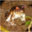

In [ ]:
x_train[0]

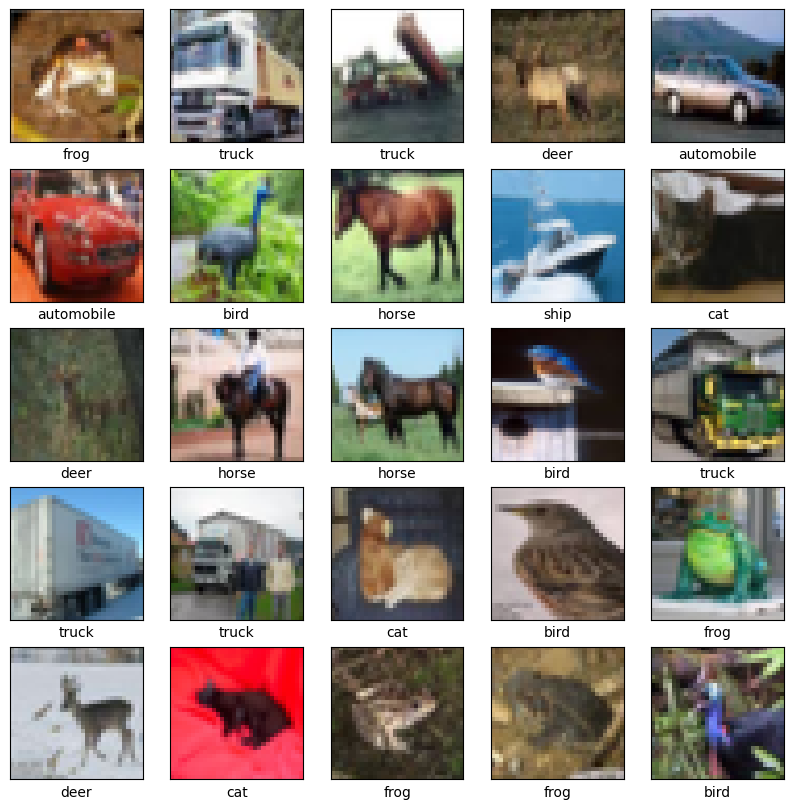

In [ ]:
plt.figure(figsize=(10,10))   # display the image
for i in range(25):   # first 25 image
    plt.subplot(5,5,i+1)  # 5*5=25
    plt.xticks([])  # hide sticks
    plt.yticks([])
    plt.imshow(x_train[i])  # image
    plt.xlabel(class_names[y_train[i][0]])  # dsiplay the name

## Model Building

In [ ]:
model=Sequential()
model.add(Conv2D(30,(3,3),activation='relu',input_shape=(32,32,3))) # (30,(3,3) filters from n-f+1(32-3+1),3*3 is filter size
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()  # check fallten size ,if its more repeat


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 30)          │             840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6750)                │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 840 (3.28 KB)

 Trainable params: 840 (3.28 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model=Sequential()
model.add(Conv2D(30,(3,3),activation='relu',input_shape=(32,32,3))) # (30,(3,3) filters from n-f+1(32-3+1),3*3 is filter size
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(13,(3,3),activation='relu'))  #(15-3+1) ,15 from past maxpooling
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 30)          │             840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 13)          │           3,523 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 13)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 468)                 │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,363 (17.04 KB)

 Trainable params: 4,363 (17.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# ANN

In [ ]:
# 468 is input neurons,# 330 for hidden alyers

In [ ]:
epochs=10
batch_size=1000
n_classes=10

In [ ]:
model.add(Dense(468,activation='relu'))
model.add(Dense(330,activation='relu'))
model.add(Dense(n_classes,activation='softmax'))

In [ ]:
468*2/3+10

322.0

In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
y_train= keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [ ]:
## model compile
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
early= EarlyStopping(patience=4,monitor='val_loss')

In [ ]:
## model_validation
history= model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(x_test,y_test),callbacks=early)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 53s 965ms/step - accuracy: 0.1457 - loss: 8.7111 - val_accuracy: 0.2658 - val_loss: 2.0919
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.2523 - loss: 2.0992 - val_accuracy: 0.3173 - val_loss: 1.9401
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 48s 958ms/step - accuracy: 0.3177 - loss: 1.9647 - val_accuracy: 0.3207 - val_loss: 1.9979
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 82s 955ms/step - accuracy: 0.3774 - loss: 1.8050 - val_accuracy: 0.3917 - val_loss: 1.7229
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.4590 - loss: 1.5440 - val_accuracy: 0.3757 - val_loss: 1.8527
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.4931 - loss: 1.4554 - val_accuracy: 0.4399 - val_loss: 1.6321
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.5412 - loss: 1.3181 - val_accuracy: 0.4700 - val_loss: 1.5622
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.5759 - loss: 1.2330 - val_accuracy: 0.4761 - 

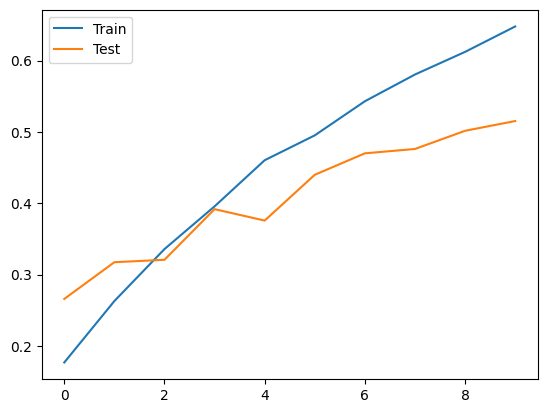

In [ ]:
plt.plot(range(10),history.history['accuracy'],label='Train')
plt.plot(range(10),history.history['val_accuracy'],label='Test')
plt.legend()

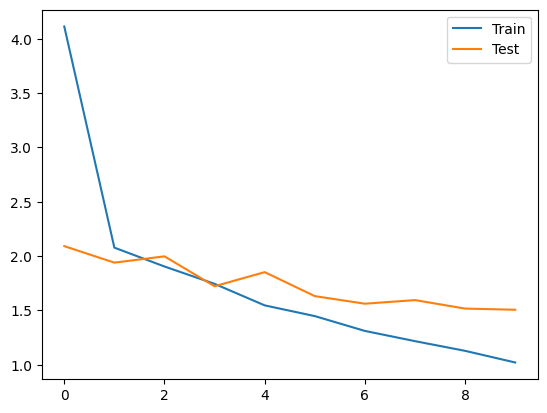

In [ ]:
plt.plot(range(10),history.history['loss'],label='Train')
plt.plot(range(10),history.history['val_loss'],label='Test')
plt.legend()

In [ ]:
y_pred=model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [ ]:
y_test[0]  # 3 ans

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [ ]:
y_pred[0]  # decimal

array([0.01632722, 0.10663683, 0.02600339, 0.71088344, 0.00522796,
       0.06398944, 0.00588986, 0.01131534, 0.05191376, 0.00181273],
      dtype=float32)

In [ ]:
np.argmax(y_pred[0])

3

In [ ]:
np.argmax(y_test[0])

3

In [ ]:
act=[]
for i in range(len(y_test)):
    act.append(np.argmax(y_test[i]))
len(act)

10000

In [ ]:
pred=[]
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
len(pred)

10000

In [ ]:
accuracy_score(act,pred)

0.5153

In [ ]:
# from outside image

In [ ]:
from PIL import Image

In [ ]:
img=Image.open('/content/cat.jpg')

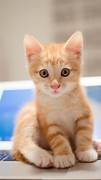

In [ ]:
img

In [ ]:
img.size

(101, 180)

In [ ]:
img1=img.resize((32,32))  # resize according to model

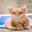

In [ ]:
img1

In [ ]:
img1.size

(32, 32)

In [ ]:
img2=np.expand_dims(img1,axis=0)  # to get pixecl values for model

In [ ]:
img2

array([[[[180, 167, 150],
         [181, 168, 151],
         [183, 170, 153],
         ...,
         [166, 149, 133],
         [165, 148, 132],
         [165, 148, 132]],

        [[183, 170, 153],
         [185, 172, 155],
         [186, 173, 156],
         ...,
         [158, 141, 125],
         [157, 140, 124],
         [157, 140, 124]],

        [[186, 173, 156],
         [187, 174, 157],
         [189, 176, 159],
         ...,
         [158, 141, 125],
         [156, 139, 123],
         [157, 140, 124]],

        ...,

        [[200, 194, 194],
         [197, 194, 197],
         [198, 196, 196],
         ...,
         [172, 147, 133],
         [192, 176, 167],
         [201, 191, 185]],

        [[196, 191, 188],
         [193, 192, 190],
         [193, 192, 190],
         ...,
         [187, 174, 164],
         [193, 181, 174],
         [198, 187, 182]],

        [[190, 179, 174],
         [188, 179, 173],
         [190, 181, 174],
         ...,
         [204, 190, 180],
        

In [ ]:
model.predict(img2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[8.5775752e-04, 2.2831055e-05, 3.5664223e-02, 7.0916873e-01,
        9.8770745e-02, 4.2734090e-02, 7.7985652e-02, 4.3774694e-03,
        2.8261052e-02, 2.1574574e-03]], dtype=float32)

In [ ]:
class_names[np.argmax(model.predict(img2))]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


'cat'